In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cleaning the Data

## Importing the data

In [15]:
titanic = pd.read_csv('data/train.csv')
titanic.describe(include='all').drop(columns=['PassengerId', 'Name'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing data?

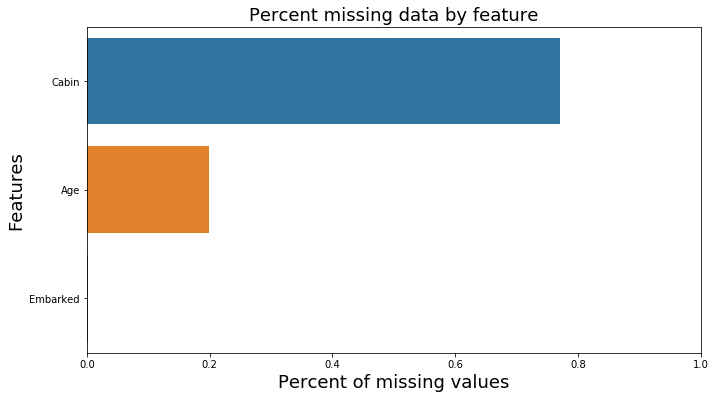

In [61]:
def nullstat(dataset):
    total=dataset.isnull().sum().sort_values(ascending=False)
    percent=(dataset.isnull().sum()/dataset.isnull().count()) \
        .sort_values(ascending=False)
    missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    missing_data=missing_data[missing_data.Percent != 0]
    f, ax = plt.subplots(figsize=(11, 6))
    sns.barplot(y=missing_data.index, x=missing_data['Percent'], orient='h')
    plt.ylabel('Features', fontsize=18)
    plt.xlabel('Percent of missing values', fontsize=18)
    plt.title('Percent missing data by feature', fontsize=18)
    plt.xlim([0.0, 1.0])

nullstat(titanic)

Stone, Mrs. George Nelson (Martha Evelyn) and her Maid Icard Miss. Amelie, embarked in Southampton<sup>1</sup>

<sup>1</sup>(2019) Martha Evelyn Stone Encyclopedia Titanica (ref: #287, updated 18th June 2019 06:25:53 AM)
URL : https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [78]:
titanic.at[829, 'Embarked'] = 'S'
titanic.at[61, 'Embarked'] = 'S'

In [103]:
titanic[titanic.Age.isna()].sort_values(by=['SibSp','Name']).drop(columns=['Name', 'Ticket']).groupby('Title').describe().T

Title                 Dr      Master        Miss          Mr         Mrs
PassengerId count    1.0    4.000000   36.000000  119.000000   17.000000
            mean   767.0  278.250000  396.694444  460.226891  362.941176
            std      NaN  291.943345  242.895841  252.455146  221.110117
            min    767.0   66.000000   29.000000    6.000000   20.000000
            25%    767.0  136.500000  234.500000  266.000000  187.000000
            50%    767.0  168.500000  345.000000  482.000000  368.000000
            75%    767.0  310.250000  594.750000  650.000000  458.000000
            max    767.0  710.000000  889.000000  879.000000  850.000000
Survived    count    1.0    4.000000   36.000000  119.000000   17.000000
            mean     0.0    0.500000    0.611111    0.117647    0.823529
            std      NaN    0.577350    0.494413    0.323552    0.392953
            min      0.0    0.000000    0.000000    0.000000    0.000000
            25%      0.0    0.000000    0.000000    0.000000    1.000000
            50%      0.0    0.500000    1.000000    0.000000    1.000000
            75%      0.0    1.000000    1.000000    0.000000    1.000000
            max      0.0    1.000000    1.000000    1.000000    1.000000
Pclass      count    1.0    4.000000   36.000000  119.000000   17.000000
            mean     1.0    3.000000    2.888889    2.588235    2.058824
            std      NaN    0.000000    0.398410    0.763708    1.028992
            min      1.0    3.000000    1.000000    1.000000    1.000000
            25%      1.0    3.000000    3.000000    3.000000    1.000000
            50%      1.0    3.000000    3.000000    3.000000    3.000000
            75%      1.0    3.000000    3.000000    3.000000    3.000000
            max      1.0    3.000000    3.000000    3.000000    3.000000
Age         count    0.0    0.000000    0.000000    0.000000    0.000000
            mean     NaN         NaN         NaN         NaN         NaN
            std      NaN         NaN         NaN         NaN         NaN
            min      NaN         NaN         NaN         NaN         NaN
            25%      NaN         NaN         NaN         NaN         NaN
            50%      NaN         NaN         NaN         NaN         NaN
            75%      NaN         NaN         NaN         NaN         NaN
            max      NaN         NaN         NaN         NaN         NaN
SibSp       count    1.0    4.000000   36.000000  119.000000   17.000000
            mean     0.0    3.250000    1.138889    0.302521    0.588235
            std      NaN    3.304038    2.282264    1.292446    0.507300
            min      0.0    1.000000    0.000000    0.000000    0.000000
            25%      0.0    1.000000    0.000000    0.000000    0.000000
            50%      0.0    2.000000    0.000000    0.000000    1.000000
            75%      0.0    4.250000    1.000000    0.000000    1.000000
            max      0.0    8.000000    8.000000    8.000000    1.000000
Parch       count    1.0    4.000000   36.000000  119.000000   17.000000
            mean     0.0    1.250000    0.388889    0.067227    0.294118
            std      NaN    0.500000    0.728120    0.361988    0.685994
            min      0.0    1.000000    0.000000    0.000000    0.000000
            25%      0.0    1.000000    0.000000    0.000000    0.000000
            50%      0.0    1.000000    0.000000    0.000000    0.000000
            75%      0.0    1.250000    0.250000    0.000000    0.000000
            max      0.0    2.000000    2.000000    2.000000    2.000000
Fare        count    1.0    4.000000   36.000000  119.000000   17.000000
            mean    39.6   31.377075   20.438547   18.566348   47.751465
            std      NaN   25.900713   23.319593   30.880861   44.595046
            min     39.6   15.245800    7.550000    0.000000    7.225000
            25%     39.6   15.245800    7.750000    7.735400   15.245800
            50%     39.6   20.356250    7.964600    7.8958

In [89]:
masters=titanic.groupby('Title').get_group('Master')

masters.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,40.000000,40.000000,40.000000,36.000000,40.000000,40.000000,40.000000
mean,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
std,301.717518,0.500641,0.627878,3.619872,1.910833,0.540062,28.051752
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,165.750000,0.000000,2.000000,1.000000,1.000000,1.000000,18.750000
50%,345.000000,1.000000,3.000000,3.500000,1.000000,1.000000,29.062500
75%,764.000000,1.000000,3.000000,8.000000,4.000000,2.000000,39.171875
max,870.000000,1.000000,3.000000,12.000000,8.000000,2.000000,151.550000


### Name Column

In [17]:
max(titanic['Name'], key=len)

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [19]:
import re 

find=re.compile(r'(\w+)\.')
titles=[find.search(i[3]).groups() for i in np.array(titanic) if find.search(i[3])]
titanic['Title'] = np.array(titles)
titles = np.unique(titles)
titles.tolist()

['Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir']

In [51]:
title_stats=[]
for title in titles:
    title_match=re.compile(title + r'\.')
    matches=np.array([i for i in np.array(titanic) if title_match.search(i[3])])
    survived=sum(matches.T[1])
    count=len(matches)    
    title_stats.append({'Title':title, 'Count':count, 'Survival Rate':survived/count})


title_stats=pd.DataFrame(sorted(title_stats, key=lambda i: i['Count'], reverse=True)).T
title_stats.columns=title_stats.T['Title']
title_stats=title_stats.T.drop(columns='Title')[['Survival Rate', 'Count']].T
title_stats

Title,Mr,Miss,Mrs,Master,Dr,Rev,Col,Major,Mlle,Capt,Countess,Don,Jonkheer,Lady,Mme,Ms,Sir
Survival Rate,0.156673,0.697802,0.792,0.575,0.428571,0,0.5,0.5,1,0,1,0,0,1,1,1,1
Count,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


In [36]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [6]:
for name, group in titanic.groupby('Title'):
        #output = 
        
        with open("title_stats.txt", "w") as f:
            f.write(name + '\n' + str(group.describe(include='all')) + '\n')